In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading the Dataset

In [3]:
df = pd.read_csv(r"C:\Users\AKSHAY\Resume Projects\ML - Regression Projects\Uber Price Prediction using Machine Learning\uber_data.csv")

In [4]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661683
4,4.9,-73.969019,40.755910,-73.969019,40.755910,1.0,0.000000


# Exploratory Data Analysis

### Information of the Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6720 entries, 0 to 6719
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        6720 non-null   float64
 1   pickup_longitude   6720 non-null   float64
 2   pickup_latitude    6720 non-null   float64
 3   dropoff_longitude  6720 non-null   float64
 4   dropoff_latitude   6720 non-null   float64
 5   passenger_count    6720 non-null   float64
 6   distance_km        6720 non-null   float64
dtypes: float64(7)
memory usage: 367.6 KB


### Checking the Attributes

In [9]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'distance_km'],
      dtype='object')

### Checking Data Type of the Columns

In [16]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
distance_km          float64
dtype: object

### Descreptive Statistics of the Dataset

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,6720.0,8.646062,3.845719,2.500000,5.700000,7.700000,10.500000,22.100000
pickup_longitude,6720.0,-73.981611,0.016150,-74.017252,-73.992754,-73.982625,-73.971162,-73.929921
pickup_latitude,6720.0,40.752499,0.021697,40.687433,40.737938,40.752998,40.766695,40.815018
dropoff_longitude,6720.0,-73.980500,0.017144,-74.029615,-73.992110,-73.981589,-73.969396,-73.922455
dropoff_latitude,6720.0,40.752801,0.023133,40.681900,40.737742,40.754080,40.767686,40.819725
passenger_count,6720.0,1.261161,0.548668,0.000000,1.000000,1.000000,1.000000,3.000000
distance_km,6720.0,2.348520,1.569465,0.000000,1.192815,1.923541,3.133177,7.878358


### Checking for Missing Values

In [22]:
df.isnull()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
6715,False,False,False,False,False,False,False
6716,False,False,False,False,False,False,False
6717,False,False,False,False,False,False,False
6718,False,False,False,False,False,False,False


In [24]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
distance_km          0
dtype: int64

## Creating function to calculate distance covered with pickup and dropoff latitudes,longitudes using Haversine Formula

In [27]:
def haversine(lat1,lon1,lat2,lon2):
    R = 6371

    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    diff_lat = lat2 - lat1
    diff_lon = lon2 - lon1

    a = np.sin(diff_lat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(diff_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

    distance = R * c
    return distance

In [29]:
del df['distance_km']

In [31]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0
4,4.9,-73.969019,40.755910,-73.969019,40.755910,1.0


## Creating a new column consisting of the calculated distance in km

In [34]:
df['distance_km'] = df.apply(lambda row: haversine(row['pickup_latitude'],row['pickup_longitude'],row['dropoff_latitude'],row['dropoff_longitude']), axis = 1)

In [36]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661683
4,4.9,-73.969019,40.755910,-73.969019,40.755910,1.0,0.000000


# Data Visualization

### Univariate Analysis

- Distribution of Fare Amounts

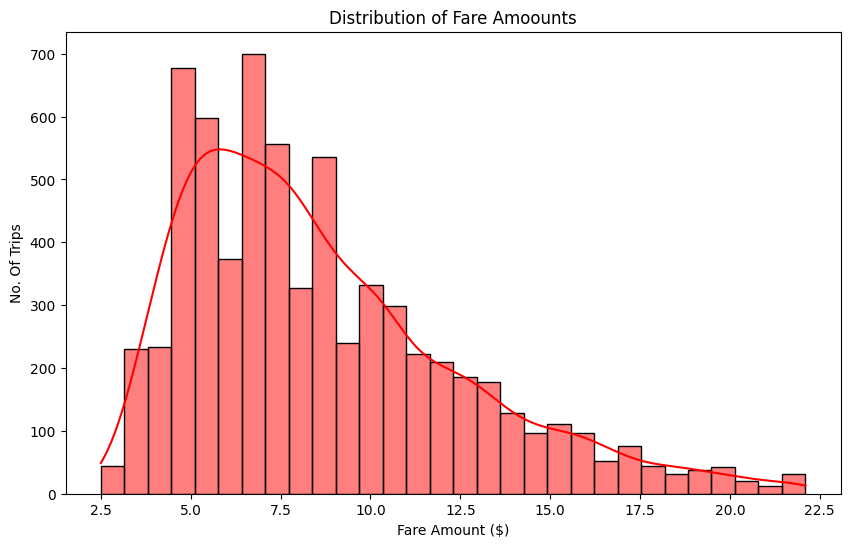

In [40]:
plt.figure(figsize=(10,6))
sns.histplot(df['fare_amount'], kde = True,color = 'red', bins = 30)
plt.title('Distribution of Fare Amoounts')
plt.xlabel('Fare Amount ($)')
plt.ylabel('No. Of Trips')
plt.show()

- Distribution of Distance

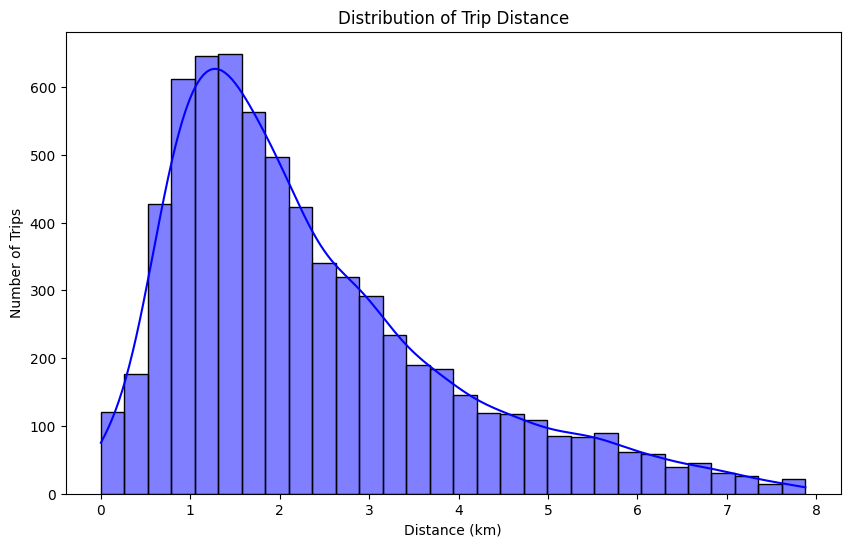

In [48]:
plt.figure(figsize=(10,6))
sns.histplot(df['distance_km'], kde = True, color = 'blue', bins = 30)
plt.title('Distribution of Trip Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Number of Trips')
plt.show()

- Boxplot of Fare Amounts

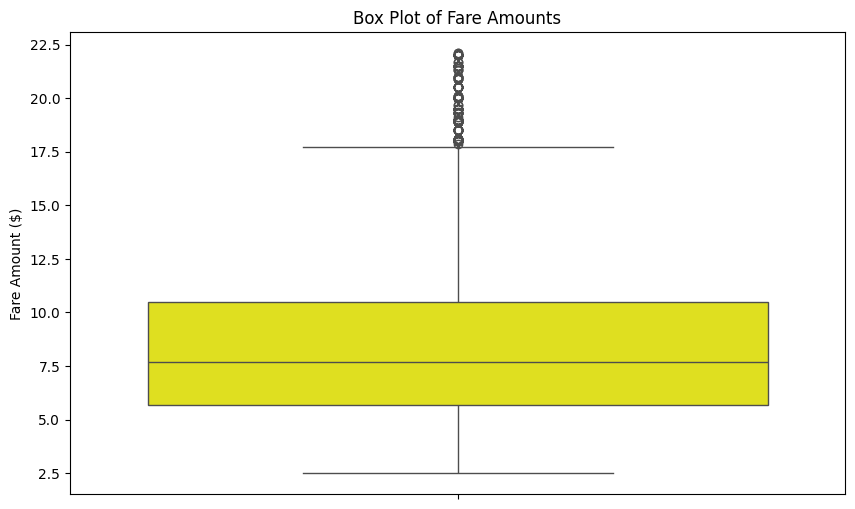

In [51]:
plt.figure(figsize=(10,6))
sns.boxplot(y = df['fare_amount'],color = 'yellow')
plt.title('Box Plot of Fare Amounts')
plt.ylabel('Fare Amount ($)')
plt.show()

### Multivariate Analysis 

- Scatter Plot with Regression Line for relation between distance km and fare amount

<Figure size 1000x600 with 0 Axes>

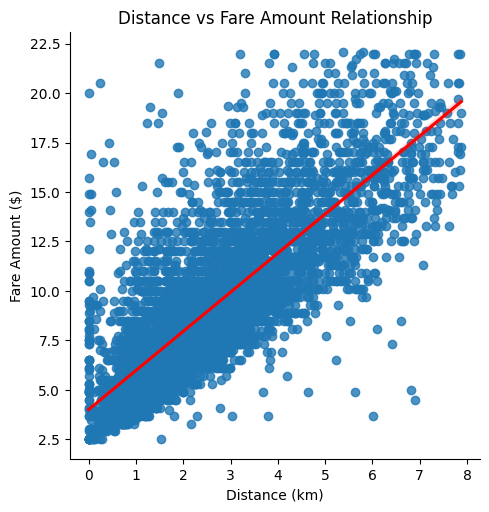

In [55]:
plt.figure(figsize=(10,6))
sns.lmplot(x = 'distance_km',y = 'fare_amount', data = df, line_kws = {'color':'red'})
plt.title('Distance vs Fare Amount Relationship')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.show()

- Box Plot of Fare Amount by Passenger Count

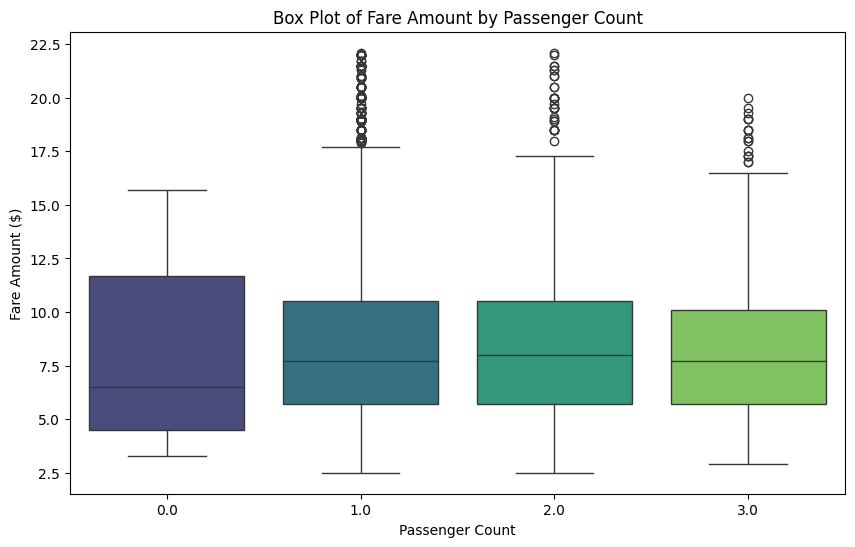

In [58]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'passenger_count', y = 'fare_amount', data = df, palette = 'viridis')
plt.title('Box Plot of Fare Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()

- Pair Plot of different attributes

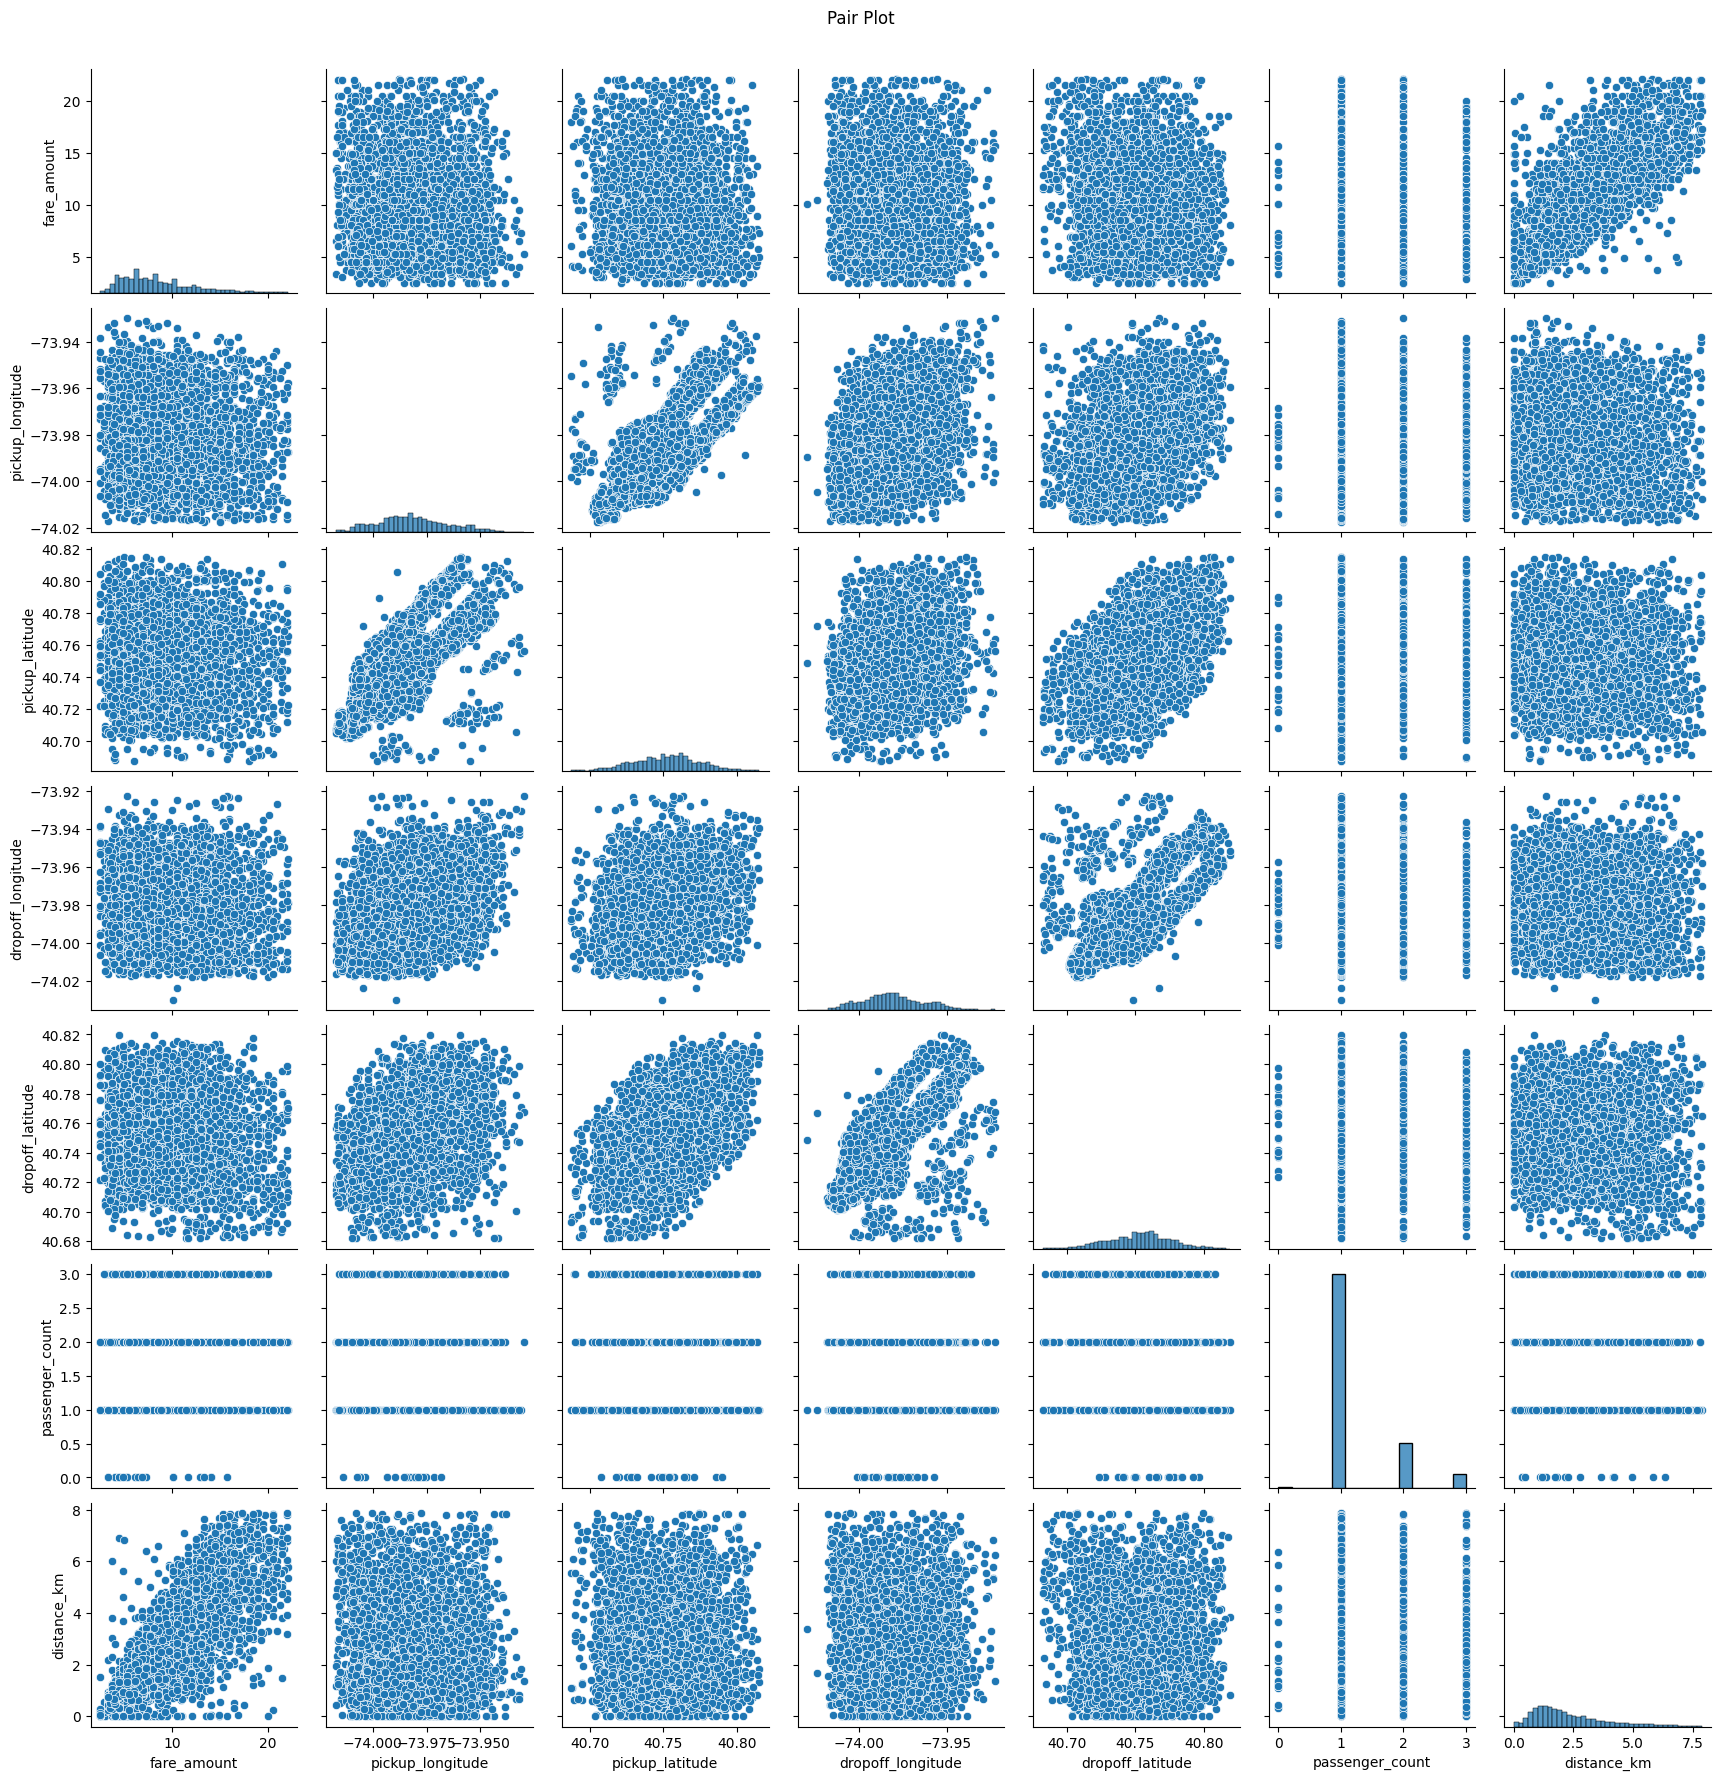

In [61]:
sns.pairplot(df[['fare_amount', 'pickup_longitude', 'pickup_latitude',
                 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance_km']])
plt.suptitle('Pair Plot', y=1.02)
plt.show()

## Correlation Matrix Heatmap

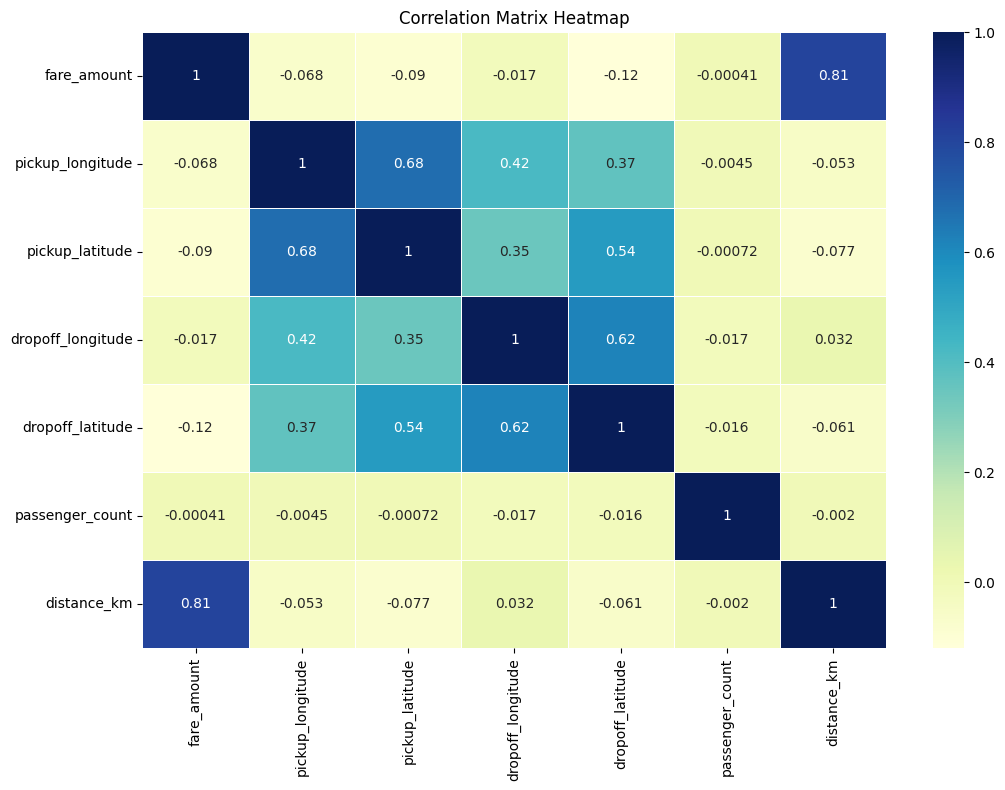

In [66]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Creating dependent and independent variables accordingly

- y contains fare_amount as Dependent variable.

- X contains fare_amount,pickup_longitude,pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count as Independent variables.

In [72]:
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [74]:
x

array([[-73.99981689,  40.73835373, -73.99951172,  40.72321701,
          1.        ,   1.68332275],
       [-73.994355  ,  40.728225  , -73.99471   ,  40.750325  ,
          1.        ,   2.45758988],
       [-74.005043  ,  40.74077   , -73.962565  ,  40.772647  ,
          1.        ,   5.03637719],
       ...,
       [-73.995007  ,  40.745027  , -74.004968  ,  40.746732  ,
          2.        ,   0.86029079],
       [-73.994098  ,  40.735441  , -73.979597  ,  40.689609  ,
          1.        ,   5.24079552],
       [-73.96337891,  40.75831985, -73.96530914,  40.76018906,
          1.        ,   0.26387617]])

In [76]:
y

array([ 7.5,  7.7, 12.9, ...,  5.5, 17.3,  5.5])

# Regression Model Predictions

### Train, Test and Split

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Scaling the data using Standard Scaler

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [87]:
x_train

array([[ 2.1661668 ,  1.28398786,  0.05265884, -0.00554537, -0.47220951,
         1.14576215],
       [ 1.09906416,  0.73345308,  0.34589187, -0.6550927 , -0.47220951,
         0.7642567 ],
       [-1.5437375 , -0.88213195, -1.3255829 , -0.72928966, -0.47220951,
        -1.27398175],
       ...,
       [ 1.08211715,  0.45214419,  1.26679236,  0.86508127, -0.47220951,
        -0.731054  ],
       [ 0.23290458,  0.03580887,  2.26033281, -0.27698187,  1.36071348,
         0.48929778],
       [ 2.03506029,  0.98609355,  1.63748865,  1.59832692, -0.47220951,
        -0.39086005]])

In [89]:
x_test

array([[-0.56905789,  0.35837208, -0.93243444, -0.25434772, -0.49121758,
        -0.55995884],
       [-0.9452985 ,  0.20518386, -0.38256694,  0.15043451, -0.49121758,
        -0.8840677 ],
       [-0.14109341, -0.26437541,  0.82880065,  0.2645269 ,  1.29309708,
        -0.09071763],
       ...,
       [-1.00039701, -0.32920019, -0.59013007,  0.94677589, -0.49121758,
         0.77581235],
       [ 1.41786309,  0.50992568,  1.38003097,  0.86761152,  1.29309708,
        -0.69964919],
       [-1.38203702, -0.2591446 , -1.06581287, -0.38810071, -0.49121758,
        -1.10248664]])

## Mean Square Error, Mean Absolute Error and R2 score functions to find accuracy

In [92]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# Linear Regressor Algorithm

In [96]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [98]:

y_pred_lr = lin_reg.predict(x_test)
y_pred_lr

array([ 7.12247969,  6.00510158,  8.33725582, ..., 10.81537655,
        6.24688271,  5.4833682 ])

### Mean Absolute Error

In [103]:
mae_lin_reg = mean_absolute_error(y_test,y_pred_lr)
mae_lin_reg

1.6288219325942905

### Mean Squared Error

In [106]:
mse_lin_reg = mean_squared_error(y_test,y_pred_lr)
mse_lin_reg

4.981602370124632

### R2 Score

In [109]:
r2_lin_reg = r2_score(y_test,y_pred_lr)
r2_lin_reg

0.650705884233856

# Decision Tree Regressor Algorithm

In [113]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [115]:
y_pred_dt = dt_reg.predict(x_test)
y_pred_dt

array([5.3, 4.5, 9. , ..., 8.5, 7.5, 3.5])

### Mean Absolute Error

In [118]:
mae_dt = mean_absolute_error(y_test,y_pred_dt)
mae_dt

2.2612127976190477

### Mean Squared Error

In [121]:
mse_dt = mean_squared_error(y_test,y_pred_dt)
mse_dt

10.628405282738095

### R2 Score

In [124]:
r2_dt = r2_score(y_test,y_pred_dt)
r2_dt

0.25477002189049913

# Random Forest Regressor Algorithm

In [127]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state = 0)
rf_reg.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [133]:
y_pred_rf = rf_reg.predict(x_test)
y_pred_rf

array([ 7.012,  6.042,  8.137, ..., 11.586,  5.989,  4.423])

### Mean Absolute Error

In [136]:
mae_rf = mean_absolute_error(y_test,y_pred_rf)
mae_rf

1.6523875

### Mean Squared Error

In [139]:
mse_rf = mean_squared_error(y_test,y_pred_rf)
mse_rf

5.413393006607143

### R2 Score

In [142]:
r2_rf = r2_score(y_test,y_pred_rf)
r2_rf

0.6204300979786623

# Support Vector Regressor Algorithm

In [147]:
from sklearn.svm import SVR
sv_reg = SVR()
sv_reg.fit(x_train,y_train)

SVR()

In [149]:
y_pred_svr = sv_reg.predict(x_test)
y_pred_svr

array([ 6.13257934,  5.39795225,  7.88442741, ..., 10.91683923,
        5.26514219,  4.54390832])

### Mean Absolute Error

In [152]:
mae_svr = mean_absolute_error(y_test,y_pred_svr)
mae_svr

1.4215032174324476

### Mean Squared Error

In [155]:
mse_svr = mean_squared_error(y_test,y_pred_svr)
mse_svr

4.391298954826489

### R2 Score

In [157]:
r2_svr = r2_score(y_test,y_pred_svr)
r2_svr

0.6920960824393264

# K Nearest Neighbors Regressor Algorithm

In [161]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train,y_train)

KNeighborsRegressor()

In [163]:
y_pred_knn = knn_reg.predict(x_test)
y_pred_knn

array([ 5.86,  7.42,  7.34, ..., 11.6 ,  5.46,  5.82])

### Mean Absolute Error

In [166]:
mae_knn = mean_absolute_error(y_test,y_pred_knn)
mae_knn

1.5889464285714285

### Mean Square Error

In [170]:
mse_knn = mean_squared_error(y_test,y_pred_knn)
mse_knn

5.013649166666666

### R2 Score

In [173]:
r2_knn = r2_score(y_test,y_pred_knn)
r2_knn

0.6484588647751336

# Lasso Regressor

In [176]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(x_train,y_train)

Lasso()

In [178]:
y_pred_lasso = lasso_reg.predict(x_test)
y_pred_lasso

array([ 7.5356178 ,  6.85326469,  8.52352108, ..., 10.34784464,
        7.24152482,  6.39342277])

### Mean Absolute Error

In [180]:
mae_lasso = mean_absolute_error(y_test,y_pred_lasso)
mae_lasso

1.8682643496829379

### Mean Square Error

In [183]:
mse_lasso = mean_squared_error(y_test,y_pred_lasso)
mse_lasso

5.912594430415398

### R2 Score

In [186]:
r2_lasso = r2_score(y_test,y_pred_lasso)
r2_lasso

0.5854276816950958

# Ridge Regressor

In [189]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(x_train,y_train)

Ridge()

In [191]:
y_pred_ridge = ridge_reg.predict(x_test)
y_pred_ridge

array([ 7.12271612,  6.00555007,  8.33735052, ..., 10.81500367,
        6.24734697,  5.48394633])

### Mean Absolute Error

In [193]:
mae_ridge = mean_absolute_error(y_test,y_pred_ridge)
mae_ridge

1.628887504351873

### Mean Square Error

In [195]:
mse_ridge = mean_squared_error(y_test,y_pred_ridge)
mse_ridge

4.981572542417814

### R2 Score

In [197]:
r2_ridge = r2_score(y_test,y_pred_ridge)
r2_ridge

0.6507079756578004

In [199]:
mse = {
    'Linear Regressor' : mse_lin_reg,
    'Decision Tree Regressor' : mse_dt,
    'Random Forest Regressor' : mse_rf,
    'Support Vector Regressor' : mse_svr,
    'K Nearest Neighbors Regressor' : mse_knn,
    'Lasso Regressor' : mse_lasso,
    'Ridge Regressor' : mse_ridge
}

In [201]:
mse_results = []

for name, mse in mse.items():
    mse_results.append({
        'Model': name,
        'MSE': mse,
    })

In [203]:
mse_results_df = pd.DataFrame(mse_results)
mse_results_df

,Model,MSE
0,Linear Regressor,4.981602
1,Decision Tree Regressor,10.628405
2,Random Forest Regressor,5.413393
3,Support Vector Regressor,4.391299
4,K Nearest Neighbors Regressor,5.013649
5,Lasso Regressor,5.912594
6,Ridge Regressor,4.981573


In [205]:
mae = {
    'Linear Regressor' : mae_lin_reg,
    'Decision Tree Regressor' : mae_dt,
    'Random Forest Regressor' : mae_rf,
    'Support Vector Regressor' : mae_svr,
    'K Nearest Neighbors Regressor' : mae_knn,
    'Lasso Regressor' : mae_lasso,
    'Ridge Regressor' : mae_ridge
}

In [207]:
mae_results = []

for name, mae in mae.items():
    mae_results.append({
        'Model': name,
        'MAE': mae,
    })

In [209]:
mae_results_df = pd.DataFrame(mae_results)
mae_results_df

,Model,MAE
0,Linear Regressor,1.628822
1,Decision Tree Regressor,2.261213
2,Random Forest Regressor,1.652387
3,Support Vector Regressor,1.421503
4,K Nearest Neighbors Regressor,1.588946
5,Lasso Regressor,1.868264
6,Ridge Regressor,1.628888


In [211]:
r2 = {
    'Linear Regressor' : r2_lin_reg,
    'Decision Tree Regressor' : r2_dt,
    'Random Forest Regressor' : r2_rf,
    'Support Vector Regressor' : r2_svr,
    'K Nearest Neighbors Regressor' : r2_knn,
    'Lasso Regressor' : r2_lasso,
    'Ridge Regressor' : r2_ridge
}

In [213]:
r2_results = []

for name, r2 in r2.items():
    r2_results.append({
        'Model': name,
        'R2_Score': r2,
    })

In [215]:
r2_results_df = pd.DataFrame(r2_results)
r2_results_df

,Model,R2_Score
0,Linear Regressor,0.650706
1,Decision Tree Regressor,0.254770
2,Random Forest Regressor,0.620430
3,Support Vector Regressor,0.692096
4,K Nearest Neighbors Regressor,0.648459
5,Lasso Regressor,0.585428
6,Ridge Regressor,0.650708


# Visualization of performance metrics

### Plot MSE

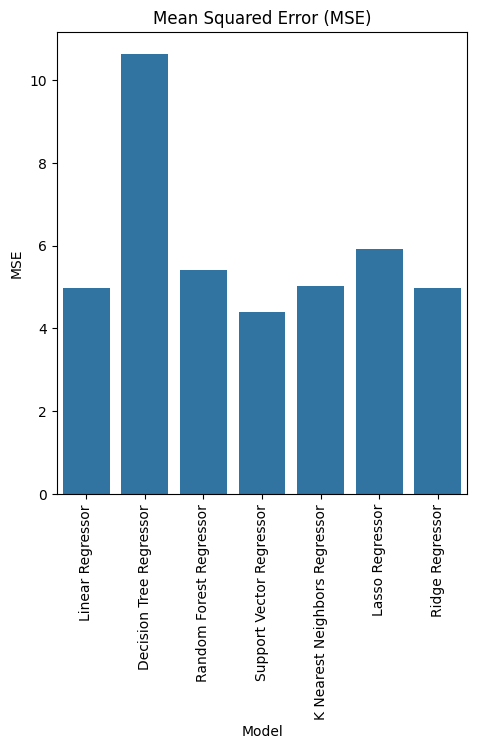

In [219]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='MSE', data=mse_results_df)
plt.xticks(rotation=90)
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.show()

### Plot MAE

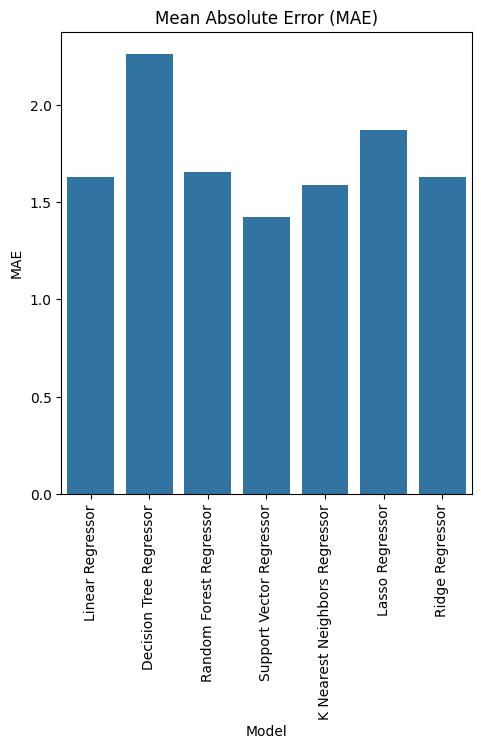

In [222]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MAE', data=mae_results_df)
plt.xticks(rotation=90)
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.show()

### Plot R-Squared

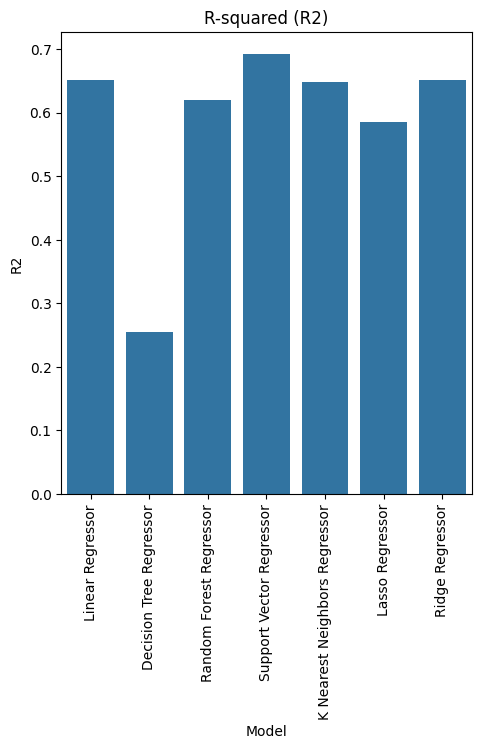

In [225]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='R2_Score', data=r2_results_df)
plt.xticks(rotation=90)
plt.title('R-squared (R2)')
plt.xlabel('Model')
plt.ylabel('R2')
plt.show()

- So as we can see according to these visualizations:
     Support Vector Regressor is the best model with low MSE, low MAE and high R2_score.

In [230]:
import pickle

model = sv_reg.fit(x_train,y_train)

# Save the model to a file
with open('svr_model.pkl', 'wb') as f:
    pickle.dump(model, f)